In [ ]:
#importing libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#importing dataset
df = pd.read_csv("/content/Titanic-Dataset.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

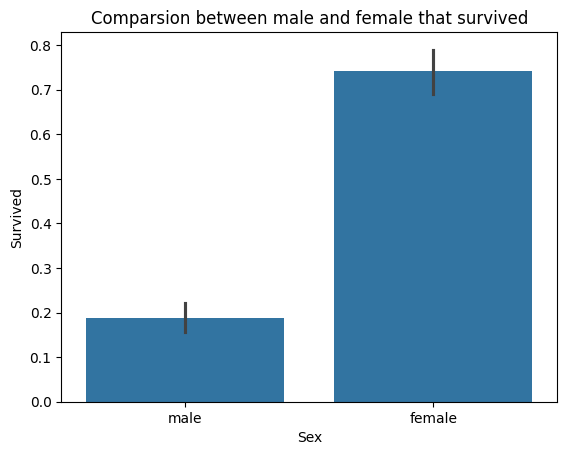

In [ ]:
#Exploratory data analysis
sns.barplot( x = 'Sex', y = 'Survived', data = df).set(title = 'Comparsion between male and female that survived')
plt.show()

<ipython-input-7-27cbead9b53f>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x = 'Pclass', y = 'Survived', data = df, color = 'blue', palette ={'1' : 'violet', '2':'orange','3' : 'green'}).set(title = 'Comparsion between Pclass that survived')


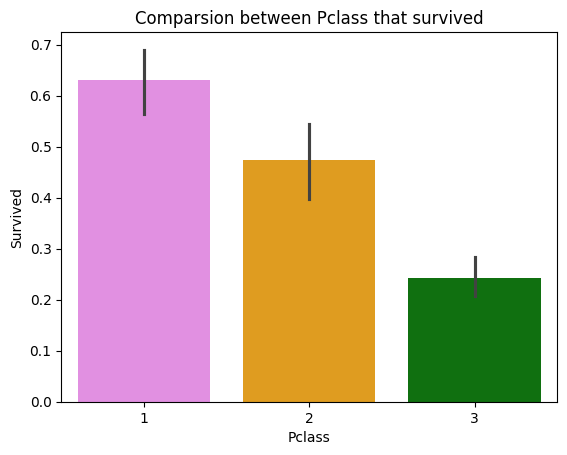

In [ ]:
sns.barplot( x = 'Pclass', y = 'Survived', data = df, color = 'blue', palette ={'1' : 'violet', '2':'orange','3' : 'green'}).set(title = 'Comparsion between Pclass that survived')
plt.show()

In [ ]:
Survived = df['Survived'].value_counts()
Survived

Survived
0    549
1    342
Name: count, dtype: int64

****

**0 : Survived**

**1 : Doest Survived**

*Decision tree classifier to classify whether passenger survived or not*
*using Decision tree because there are specifically two classes mentioned*

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
le

LabelEncoder()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Separate features and target
X = df[['Sex', 'Pclass']]
y = df['Survived']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create a decision tree classifier
clf = DecisionTreeClassifier(criterion='entropy', max_depth=5)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

In [ ]:
# Evaluate the accuracy of the classifier
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.78



 The accuracy of the decision tree classifier is 78.67% on the test set.
 This means that the classifier correctly predicted whether a passenger
  will survive or not is 78.67% of the cases.
 This is a relatively good accuracy, considering that the data set is relatively small and that there are only two classes.

